In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#seeing the numerical distribution of columsn
df.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [28]:
#total number of unique values 
df[['city', 'brand', 'container', 'shop']].nunique()

city         5
brand        5
container    3
shop         6
dtype: int64

In [16]:
#total number of null values
df.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [17]:
#how many rows only have null values 
only_null_rows = df[df.isnull().all(axis = 1)]
only_null_rows

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#drop rows with all null values
df = df.dropna(how = 'all')

In [19]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [20]:
#checking if null values still exist 
df.isnull().sum()

id            0
date          0
city          0
lat          51
long         46
pop           0
shop          0
brand         0
container    16
capacity     15
price         0
quantity      0
dtype: int64

In [21]:
#dropping all rows with na values 
df = df.dropna()

In [22]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [25]:
#drop column named id since index represents that
df = df.drop('id', axis = 1)

In [26]:
df

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...
6475,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [ ]:
#pre-processing
1. convert date into date_time
2. extract day of the week, month of the year, year
3. shop number from shop e.g 1 from "shop_1"
4. capacity convert to ml 

In [33]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['shop_number'] = df['shop'].str.extract(r'(\d+)').astype(int)

TypeError: replace expected at least 2 arguments, got 1

In [34]:
df

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,day_of_week,month,year,shop_number
0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,1,1,2012,1
1,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1,1,2012,1
2,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,1,1,2012,1
3,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,1,1,2012,1
4,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,1,1,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,2017-12-31,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,6,12,2017,3
6476,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,6,12,2017,5
6477,2017-12-31,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,6,12,2017,6
6478,2017-12-31,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,6,12,2017,4


In [35]:
#standardizing ml
def convert_to_ml(value):
    value = str(value).lower().strip()
    if "ml" in value:
        return float(value.replace("ml", "").strip())
    elif "lt" in value:
        return float(value.replace("lt", "").strip()) * 1000
    else:
        return None  

df["capacity_ml"] = df["capacity"].apply(convert_to_ml)

In [36]:
df

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,day_of_week,month,year,shop_number,capacity_ml
0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,1,1,2012,1,500.0
1,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1,1,2012,1,1500.0
2,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,1,1,2012,1,330.0
3,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,1,1,2012,1,500.0
4,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,1,1,2012,1,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,2017-12-31,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,6,12,2017,3,1500.0
6476,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,6,12,2017,5,330.0
6477,2017-12-31,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,6,12,2017,6,500.0
6478,2017-12-31,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,6,12,2017,4,1500.0


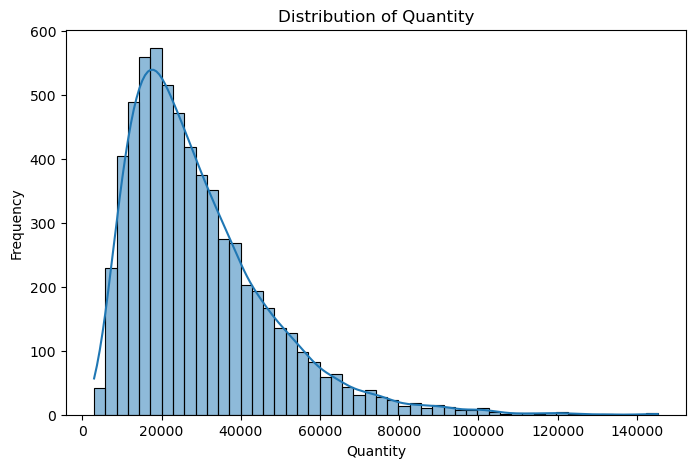

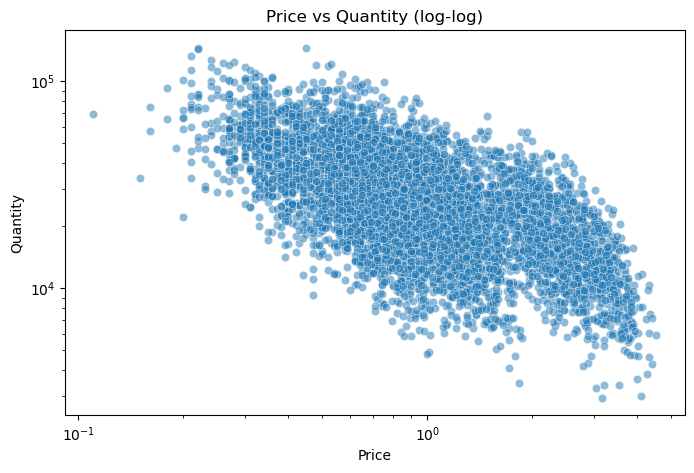

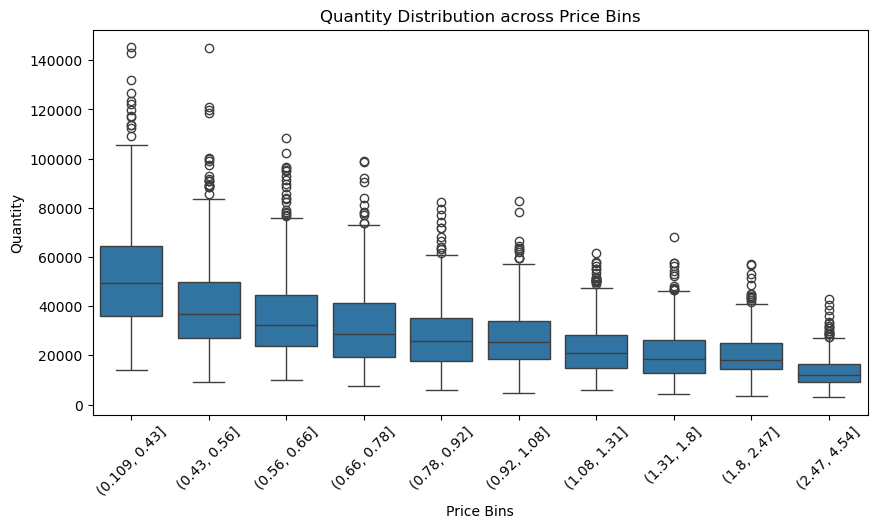

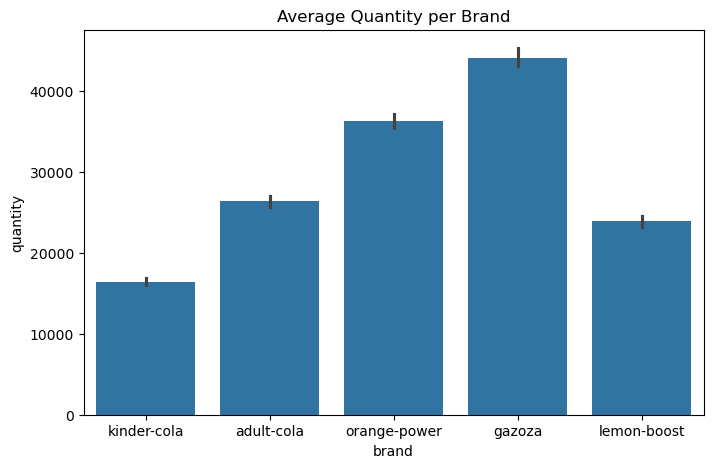

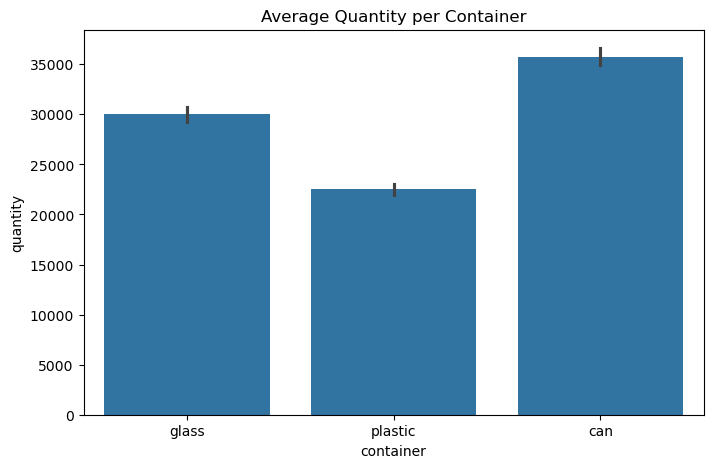

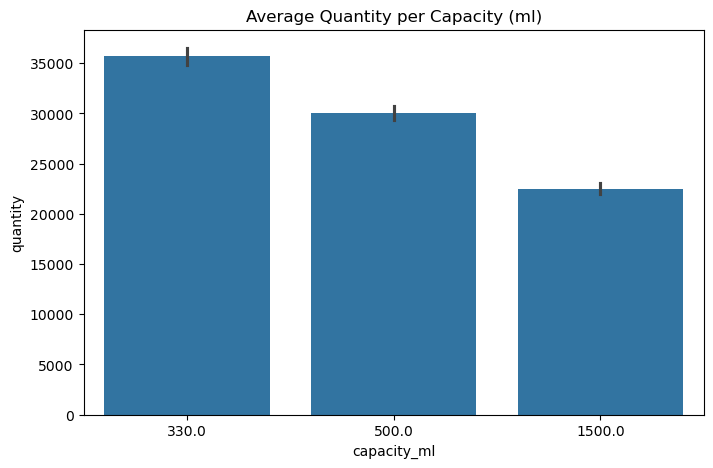

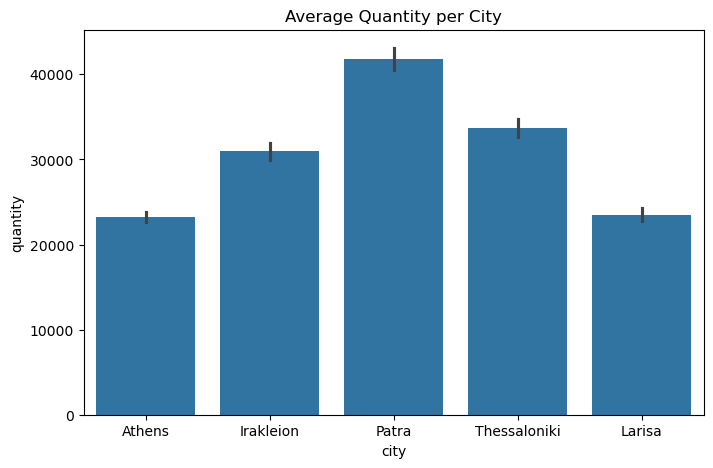

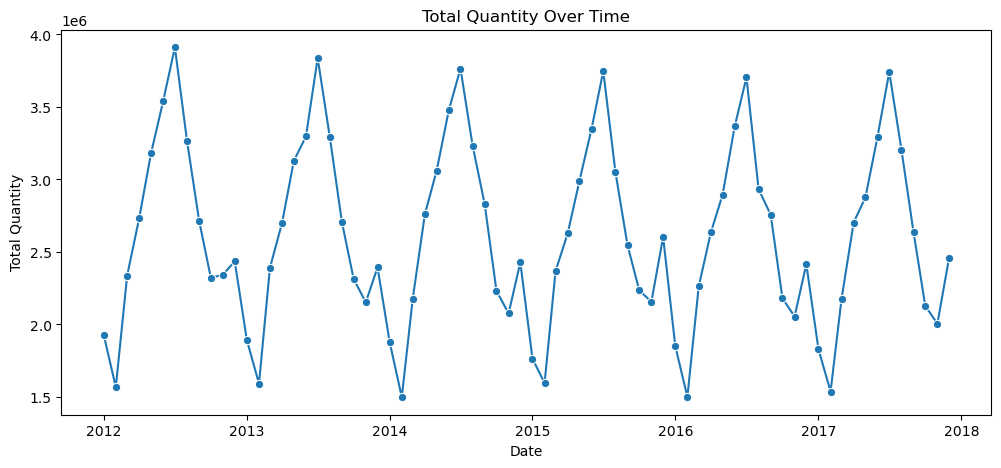

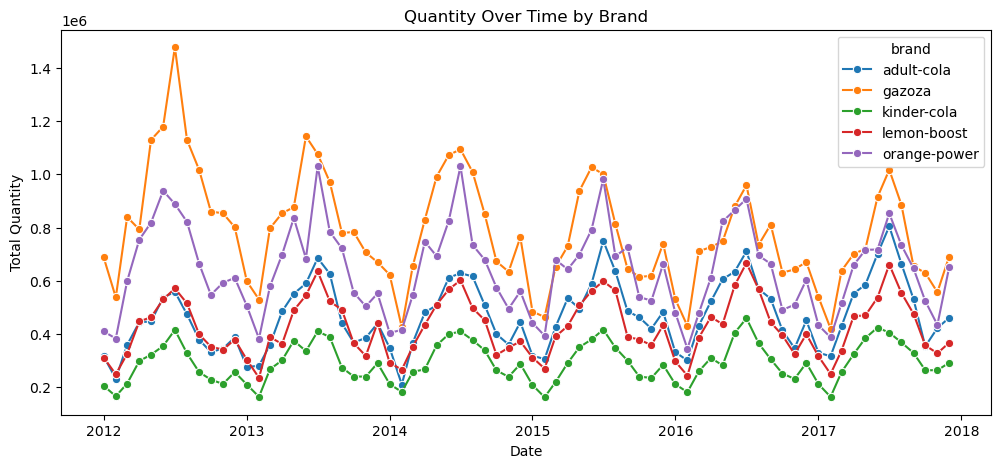

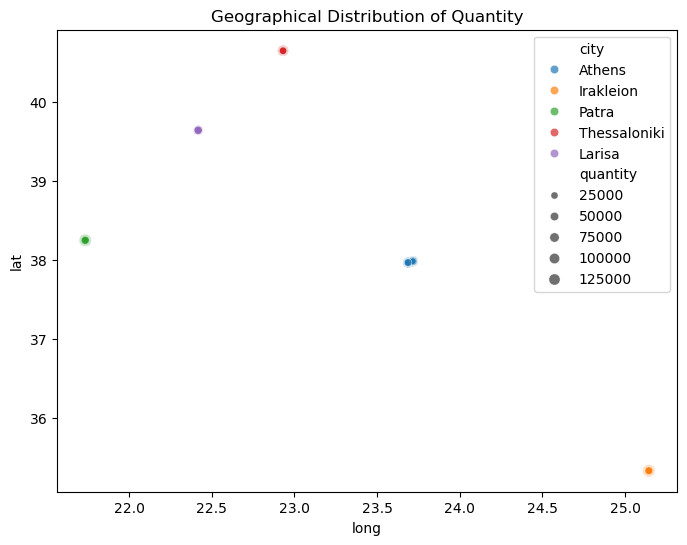

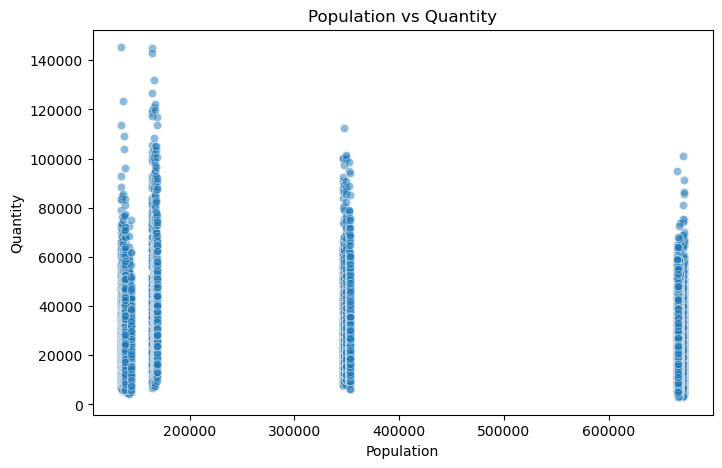

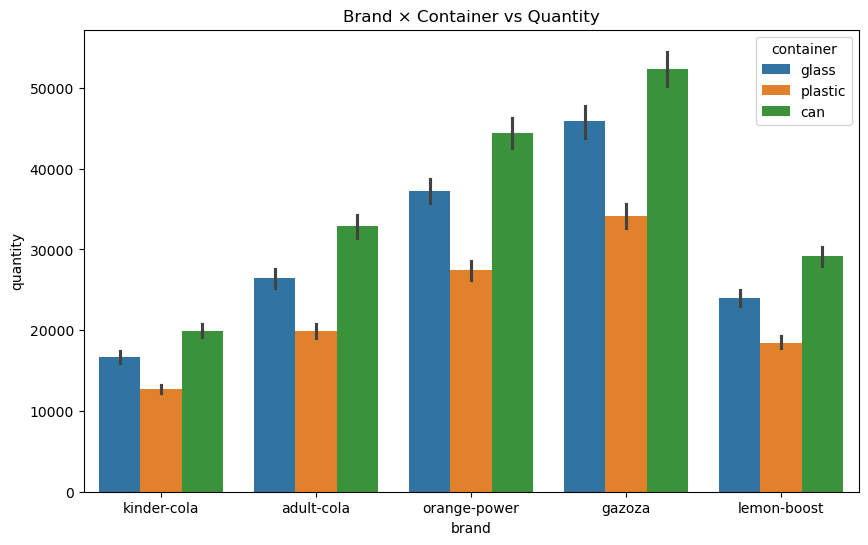

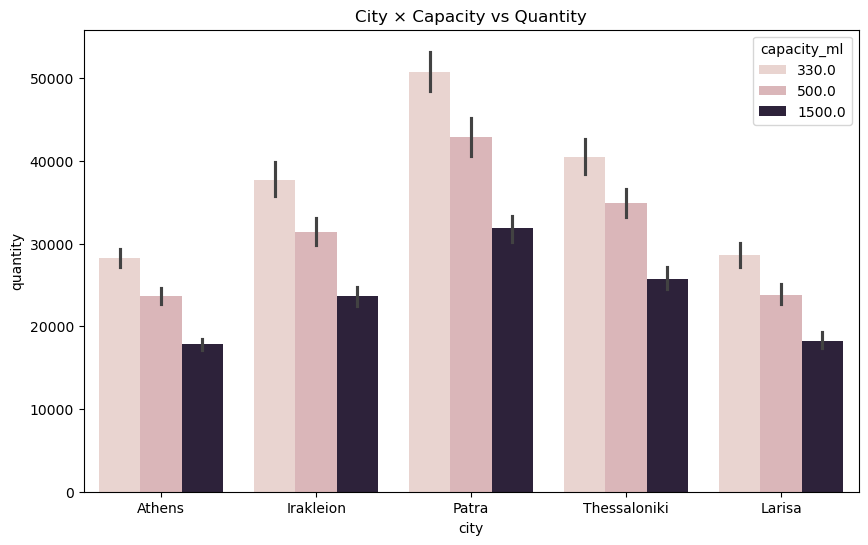

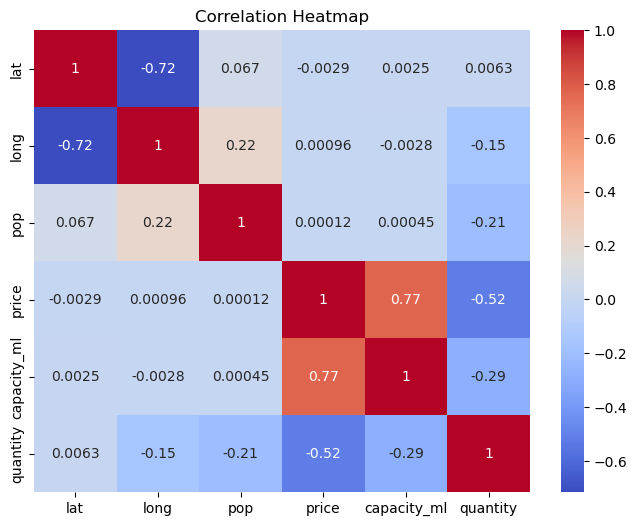

In [41]:
#exploring different plots
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# 2. Price vs Quantity
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price', y='quantity', alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.title("Price vs Quantity (log-log)")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=pd.qcut(df['price'], 10), y='quantity', data=df)
plt.xticks(rotation=45)
plt.title("Quantity Distribution across Price Bins")
plt.xlabel("Price Bins")
plt.ylabel("Quantity")
plt.show()

# 3. Categorical Feature Analysis
plt.figure(figsize=(8,5))
sns.barplot(x='brand', y='quantity', data=df, estimator='mean')
plt.title("Average Quantity per Brand")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='container', y='quantity', data=df, estimator='mean')
plt.title("Average Quantity per Container")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='capacity_ml', y='quantity', data=df, estimator='mean')
plt.title("Average Quantity per Capacity (ml)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='city', y='quantity', data=df, estimator='mean')
plt.title("Average Quantity per City")
plt.show()

# 4. Time Trends
monthly_sales = df.groupby(['year','month'])['quantity'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year','month']].assign(day=1))

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='date', y='quantity', marker='o')
plt.title("Total Quantity Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(
    data=df.groupby(['year','month','brand'])['quantity'].sum().reset_index()
        .assign(date=lambda d: pd.to_datetime(d[['year','month']].assign(day=1))),
    x='date', y='quantity', hue='brand', marker='o'
)
plt.title("Quantity Over Time by Brand")
plt.xlabel("Date")
plt.ylabel("Total Quantity")
plt.show()

# 5. Geographical Factors
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='long', y='lat', size='quantity', hue='city', alpha=0.7)
plt.title("Geographical Distribution of Quantity")
plt.show()

# 6. Population vs Demand
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='pop', y='quantity', alpha=0.5)
plt.title("Population vs Quantity")
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

# 7. Feature Interactions
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='brand', y='quantity', hue='container', estimator='mean')
plt.title("Brand × Container vs Quantity")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='city', y='quantity', hue='capacity_ml', estimator='mean')
plt.title("City × Capacity vs Quantity")
plt.show()

# 8. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['lat','long','pop','price','capacity_ml','quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
df

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,day_of_week,month,year,shop_number,capacity_ml
0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,1,1,2012,1,500.0
1,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1,1,2012,1,1500.0
2,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,1,1,2012,1,330.0
3,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,1,1,2012,1,500.0
4,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,1,1,2012,1,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,2017-12-31,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,6,12,2017,3,1500.0
6476,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,6,12,2017,5,330.0
6477,2017-12-31,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,6,12,2017,6,500.0
6478,2017-12-31,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,6,12,2017,4,1500.0


In [45]:
#baseline model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

X = df.drop(columns=['quantity','date'])
y = df['quantity']

X = pd.get_dummies(X, columns=['city','shop','brand','container','capacity'], drop_first=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Clip negative predictions (important for MAPE)
y_pred = np.maximum(y_pred, 0)

# Evaluate
mape = mean_absolute_percentage_error(y_val, y_pred)
print("Baseline MAPE:", mape)

Baseline MAPE: 0.3449958158892212


In [46]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
y_pred_rf = np.maximum(y_pred_rf, 0)

print("Random Forest MAPE:", mean_absolute_percentage_error(y_val, y_pred_rf))

Random Forest MAPE: 0.14085455961505186


In [49]:
#XGboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_pred_xgb = np.maximum(y_pred_xgb, 0)

print("XGBoost MAPE:", mean_absolute_percentage_error(y_val, y_pred_xgb))

XGBoost MAPE: 0.0813964816098767


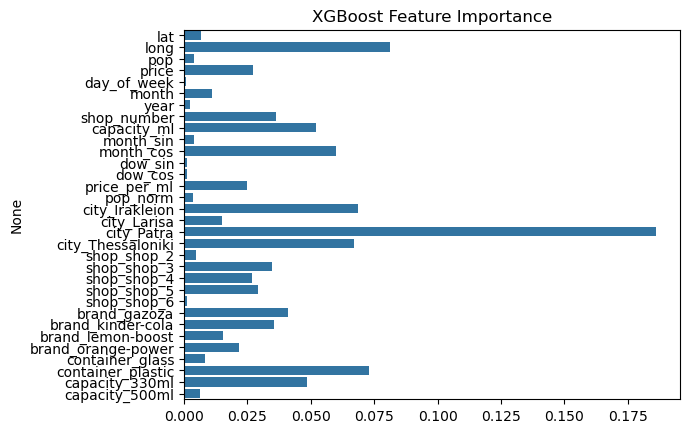

In [51]:
#feature importance
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=xgb.feature_importances_, y=X_train.columns)
plt.title("XGBoost Feature Importance")
plt.show()

In [52]:
#testing
test = pd.read_csv("test.csv")

# Date features
test['date'] = pd.to_datetime(test['date'], dayfirst=True)
test['day_of_week'] = test['date'].dt.dayofweek
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

# Shop number
test['shop_number'] = test['shop'].str.extract(r'(\d+)').astype(int)

# Capacity in ml
def convert_to_ml(value):
    value = str(value).lower().strip()
    if "ml" in value:
        return float(value.replace("ml", "").strip())
    elif "lt" in value:
        return float(value.replace("lt", "").strip()) * 1000
    else:
        return None  

test["capacity_ml"] = test["capacity"].apply(convert_to_ml)

/tmp/ipykernel_775/3513260796.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['date'] = pd.to_datetime(test['date'], dayfirst=True)


In [53]:
test

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,day_of_week,month,year,shop_number,capacity_ml
0,6480,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,2,1,2018,1,1500.0
1,6481,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,2,1,2018,1,330.0
2,6482,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,2,1,2018,1,500.0
3,6483,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,2,1,2018,1,500.0
4,6484,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,2,1,2018,1,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,2018-12-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,0,12,2018,1,1500.0
1076,7556,2018-12-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,0,12,2018,1,1500.0
1077,7557,2018-12-31,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,0,12,2018,6,330.0
1078,7558,2018-12-31,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,0,12,2018,4,1500.0


In [54]:
# 1. Drop id and date before encoding
X_test = test.drop(columns=['id','date'])

# 2. One-hot encode categorical variables (same as training)
X_test = pd.get_dummies(
    X_test,
    columns=['city','shop','brand','container','capacity'],
    drop_first=True
)

# 3. Align columns with training
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. Predict with fitted model
test['quantity'] = np.maximum(xgb.predict(X_test), 0)

# 5. Save submission
submission = test[['id','quantity']]
submission.to_csv("submissions.csv", index=False)

print("Submission file created:", submission.head())

Submission file created:      id      quantity
0  6480  17498.171875
1  6481  30053.585938
2  6482  39613.863281
3  6483  54379.441406
4  6484  37023.054688


In [55]:
submission['quantity'] = submission['quantity'].round().astype(int)

/tmp/ipykernel_775/2179925907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['quantity'] = submission['quantity'].round().astype(int)


In [56]:
submission.to_csv("submissions.csv", index=False)

Report

I needed to build a machine learning model that could predict how much of different products shops would sell based on things like price, product features, and which shop it was. Basically, helping businesses figure out demand forecasting.
Getting the Data Ready

The raw data needed some serious cleanup first. I converted messy date formats into something Python could actually work with, then pulled out useful time-based features like what day of the week and month it was. The shop information was buried in text, so I extracted numeric shop IDs that the algorithms could understand.
One tricky part was dealing with product sizes - some were listed in milliliters, others in liters. I standardized everything to milliliters and created a "price per ml" feature to capture unit pricing, which seemed like it would matter for demand. I also used some trigonometric encoding (sine and cosine functions) for cyclical features like months and days, since January and December are actually close to each other seasonally, even though numerically they're far apart.


The exploratory analysis uncovered some interesting patterns. Turns out price and container size were strongly linked (no surprise there), and both had a negative relationship with quantity sold - basically, bigger and pricier items sold in smaller volumes. The 330ml containers were the clear winners in terms of sales volume, which makes sense since they're affordable and convenient.
Geography mattered too. Cities like Thessaloniki and Patra consistently outperformed Larisa in sales. The time-series plots showed clear seasonal patterns that repeated year after year, confirming that timing matters just as much as product characteristics.

I tested three different approaches using Mean Absolute Percentage Error to see which performed best. Linear Regression was my baseline and frankly performed pretty poorly with about 34.5% error - turns out demand isn't a simple linear relationship. Random Forest did much better at around 14.1% error by capturing more complex interactions between features. But XGBoost was the clear winner with just 8.1% error, really excelling at finding those subtle patterns and feature interactions that drive demand.
Given XGBoost's superior performance, I retrained it on all available training data and used it to generate the final predictions. The model's ability to handle non-linear relationships and feature interactions made it perfect for this type of demand forecasting problem.